# New York City Airbnb 2019 Statistical Analysis
### FE 541 Final Project
### Presented By Daniyal Mufti

### 1. Introduction

I will be analyzing the New York City Airbnb calendar year 2019 data as part of my summer 2021 FE 541 final project. This project was chosen because of the rich dataset and interesting subject matter. Airbnb is a recent invention(incepted in 2007) and is a technology based invention which has enhanced the way people consider temporary lodging. Moreover looking at one of the busiest tourist hub in the world like New York City will hopefully provide us some meaningful insights to take away from this analysis. 

### 2. Data Setup

#### Let's start with installing and loading our packages and libraries respectively

In [8]:
#Install needed packages
install.packages("ggmap")
install.packages("leaflet")
#install.packages("plotly")
install.packages("viridis")
install.packages("mapproj")
install.packages('magick')
update.packages("dplyr")
install.packages('tidyverse')
install.packages('ggplot2',dependencies = TRUE)
install.packages("broom", type="binary")
install.packages("corrplot")
install.packages("DT")
install.packages("data.table", type = "binary")
install.packages("rlang")
#install.packages("car")

#Load libraries
library(ggplot2)
#library(GGally)
library(plyr)
library(dplyr)
library(ggmap)
library(tidyr)
library(maps)
library(leaflet)
#library(plotly)
library(viridis)
library(mapproj)
library(png)
library(magick)
#library(tidyverse)
library(corrplot)
library(DT)
#library(car)

package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages


Warning message:
"package 'leaflet' is in use and will not be installed"Warning message:
"package 'viridis' is in use and will not be installed"Warning message:
"package 'mapproj' is in use and will not be installed"


  There is a binary version available but the source version is later:
       binary source needs_compilation
magick  2.7.2  2.7.3              TRUE

  Binaries will be installed


Warning message:
"package 'magick' is in use and will not be installed"also installing the dependency 'jsonlite'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Daniy\Anaconda3\envs\R\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\Daniy\Anaconda3\envs\R\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages


also installing the dependencies 'testthat', 'vdiffr'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
testthat  3.0.2  3.0.4              TRUE
vdiffr    0.3.3  1.0.2              TRUE
ggplot2   3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'testthat' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages


installing the source package 'ggplot2'




  There is a binary version available (and will be installed) but the
  source version is later:
      binary source
broom  0.7.6  0.7.9

package 'broom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.90             FALSE



installing the source package 'corrplot'

Warning message:
"package 'DT' is in use and will not be installed"

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Daniy\Anaconda3\envs\R\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Daniy\Anaconda3\envs\R\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\Daniy\AppData\Local\Temp\Rtmpo5Bsk7\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggmap' was built under R version 3.6.3"Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


#### Now lets load our data

In [9]:
AirBNB_2019_data = read.csv('C:\\Users\\Daniy\\OneDrive\\Desktop\\FE 541\\Project\\AB_NYC_2019.csv')
head(AirBNB_2019_data,10)

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,NA,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### 3. Data Summary and Graphical/Geospatial Analysis

We will summarize the data and see if we can find some interesting insights in the data which will help us determine down the road what kind of questions we can ask and what kind of statistical inferences we can deduce.  

In [10]:
str(AirBNB_2019_data)

'data.frame':	48895 obs. of  16 variables:
 $ id                            : int  2539 2595 3647 3831 5022 5099 5121 5178 5203 5238 ...
 $ name                          : Factor w/ 47906 levels "","'Fan'tastic",..: 12661 38172 45171 15702 19366 25001 8337 25048 15597 17682 ...
 $ host_id                       : int  2787 2845 4632 4869 7192 7322 7356 8967 7490 7549 ...
 $ host_name                     : Factor w/ 11453 levels "","'Cil","-TheQueensCornerLot",..: 5051 4846 2962 6264 5982 1970 3601 9699 6935 1264 ...
 $ neighbourhood_group           : Factor w/ 5 levels "Bronx","Brooklyn",..: 2 3 3 2 3 3 2 3 3 3 ...
 $ neighbourhood                 : Factor w/ 221 levels "Allerton","Arden Heights",..: 109 128 95 42 62 138 14 96 203 36 ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.8 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -73.9 ...
 $ room_type                     : Factor w/ 3 levels "Entire home/apt",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ price        

##### We see that we have quite a few factors which are categorical and many of which are numeric/integers. 

In [11]:
summary(AirBNB_2019_data)

       id                                         name      
 Min.   :    2539   Hillside Hotel                  :   18  
 1st Qu.: 9471945   Home away from home             :   17  
 Median :19677284                                   :   16  
 Mean   :19017143   New york Multi-unit building    :   16  
 3rd Qu.:29152178   Brooklyn Apartment              :   12  
 Max.   :36487245   Loft Suite @ The Box House Hotel:   11  
                    (Other)                         :48805  
    host_id                 host_name        neighbourhood_group
 Min.   :     2438   Michael     :  417   Bronx        : 1091   
 1st Qu.:  7822033   David       :  403   Brooklyn     :20104   
 Median : 30793816   Sonder (NYC):  327   Manhattan    :21661   
 Mean   : 67620011   John        :  294   Queens       : 5666   
 3rd Qu.:107434423   Alex        :  279   Staten Island:  373   
 Max.   :274321313   Blueground  :  232                         
                     (Other)     :46943                  

Looking at the summary data there are some interesting insights we can see:
1. A large portion of our data is located in the Brooklyn and Manattan boroughs.
2. Shared room type is a small percentage of the type of rooms rented out.
3. The average price is 152; However the max goes up to 10000.

##### Let's have a look at this data geospatially  and see if we can further deduce some insights from the data

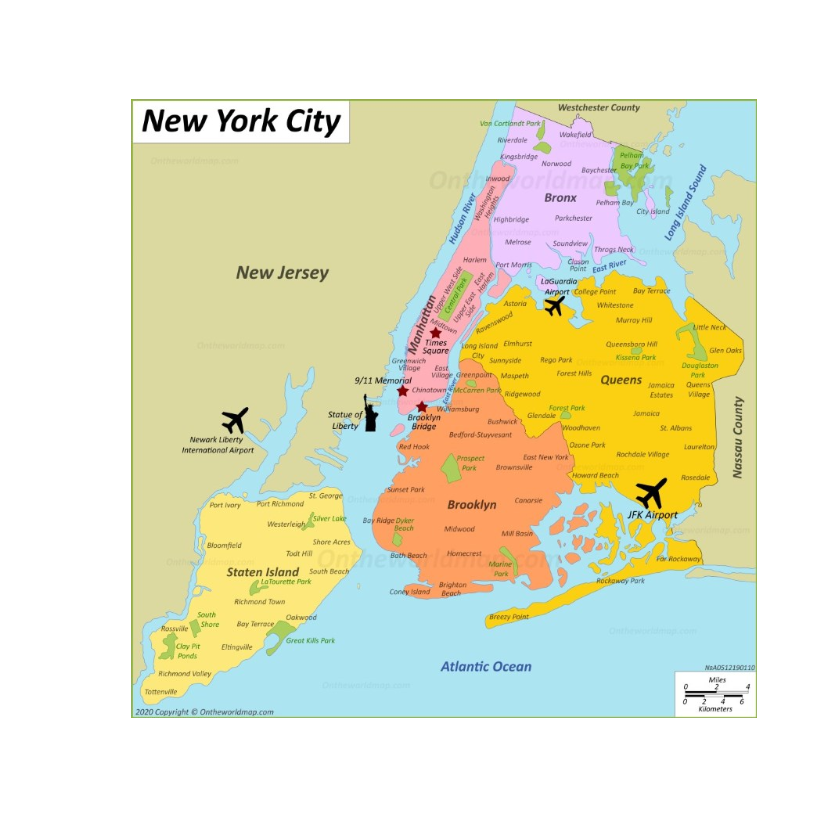

In [12]:
img <- magick::image_read('C:\\Users\\Daniy\\OneDrive\\Desktop\\FE 541\\Project\\New_York_City_Image.png')
plot(img)

Warning message:
"Transformation introduced infinite values in discrete y-axis"

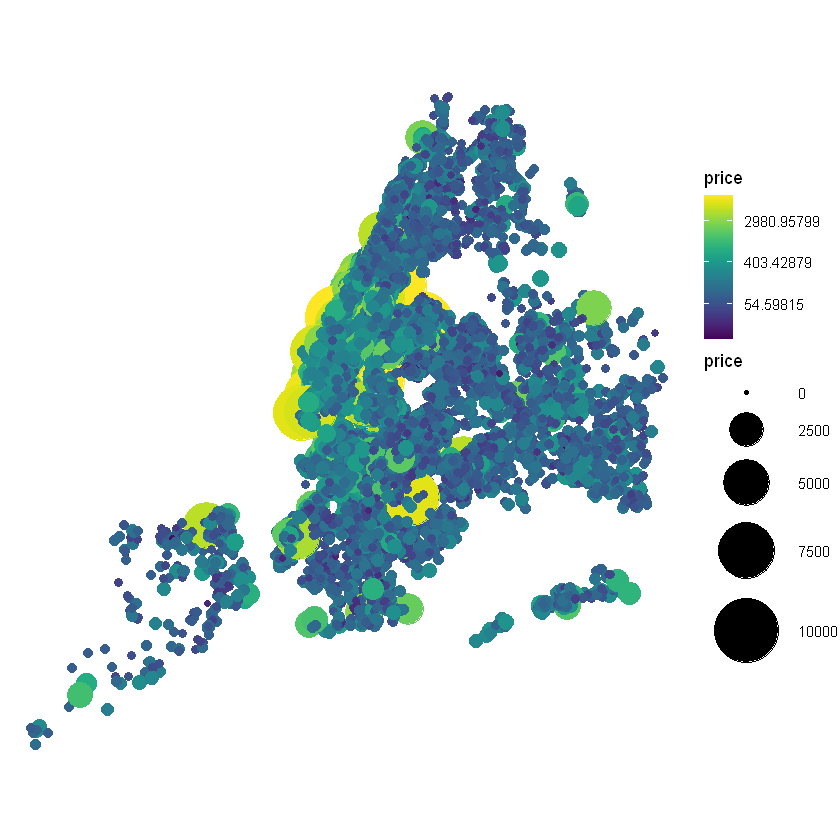

In [14]:
MainStates <- map_data("state")
NewStates <- filter(MainStates,region ==  "New York City")
longitude = AirBNB_2019_data$longitude
latitude = AirBNB_2019_data$latitude
price = AirBNB_2019_data$price
ggplot() + 
geom_point(data=AirBNB_2019_data, aes(x=longitude, y=latitude, size=price,
                                       color=price)) +
scale_size_continuous(range=c(1,18)) +
scale_color_viridis(trans="log") +
theme_void() + coord_map() 

I have used the longitude and latitude values provided to create a bubble chart. Each bubble represents an instance of a data point. The size and color of the points are based on the price of the instance. Above this bubble chart I have provided an image of the map of New York City for easy reference.

Looking at this we can further see some interesting insights into the data. Our numerical data summary already provided us with the insight that most of point density is located within Brooklyn and Manhattan. We are, to a lesser degree, able to deduce this by looking at the bubble chart however it is not as clear as looking at numerical data. What does stand out in our geospatial analysis is the point density of high price instances being mostly centralized in Manhattan. With this piece of information we can hypothesize that the mean price value of instances in Manhattan are greater than the mean price value of  instances in Brooklyn(our other highly dense borough). We will get to statistical inference testing later on in our analysis.   

##### Let's split out data further by borough and property type to see if we can infer further insights

In [16]:
airbnb_df = AirBNB_2019_data
# Subsetting the dataframe for later analysis
airbnb_by_area <- airbnb_df %>%
  select(id, name, host_id, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, number_of_reviews)

airbnb_by_property <- airbnb_df %>%
  select(id, name, host_id, host_name, neighbourhood_group, neighbourhood,
         price, number_of_reviews, calculated_host_listings_count)
# Statistical summary of pricing and property type by neighborhood group
airbnb_by_area %>%
  group_by(neighbourhood_group) %>%
  summarize(min_price = min(price), max_price = max(price), avg_price = mean(price))

neighbourhood_group,min_price,max_price,avg_price
Bronx,0,2500,87.49679
Brooklyn,0,10000,124.38321
Manhattan,0,10000,196.87581
Queens,10,10000,99.51765
Staten Island,13,5000,114.81233


Interesting, looking at the min price we see that there are 0 priced listings. I would say at this point, if I were working at AirBNB, I would investigate the reasoning behind the 0 priced listings. Perhaps there are real situations where people want someone to take care of their place and let people live there for free but at the moment I am going to consider these as bad data points to be removed.

Another interesting insight I see is that the max prices for each borough are much higher than the average price even within the borough. Analyzing the data, I am infering that these max prices and values around these max prices represent the value of renting a place for the duration of a specific stay whereas the values around the mean are more representative of daily price for the stay. I do not, unfortuantely have a way to verify this so at the moment so I will continue with these values included for the moment.  

##### Let's dive a little bit deeper

In [18]:
# Excluding price = 0 from the dataset
airbnb_by_area <- subset(airbnb_by_area, price > 0)

airbnb_by_property <- subset(airbnb_by_property, price > 0)

# Statistical summary of pricing by property type and neighborhood group
airbnb_by_area %>%
  group_by(neighbourhood_group, room_type) %>%
  summarize(min_price = min(price), max_price = max(price), avg_price = mean(price))

`summarise()` has grouped output by 'neighbourhood_group'. You can override using the `.groups` argument.


neighbourhood_group,room_type,min_price,max_price,avg_price
Bronx,Entire home/apt,28,1000,127.50660
Bronx,Private room,10,2500,66.89094
Bronx,Shared room,20,800,59.80000
Brooklyn,Entire home/apt,10,10000,178.34620
Brooklyn,Private room,10,7500,76.54543
Brooklyn,Shared room,15,725,50.77372
Manhattan,Entire home/apt,10,10000,249.25799
Manhattan,Private room,10,9999,116.77662
Manhattan,Shared room,10,1000,88.97708
Queens,Entire home/apt,10,2600,147.05057


##### For most of these max_price listings, the deeper dive shows that the same problem still exists. 

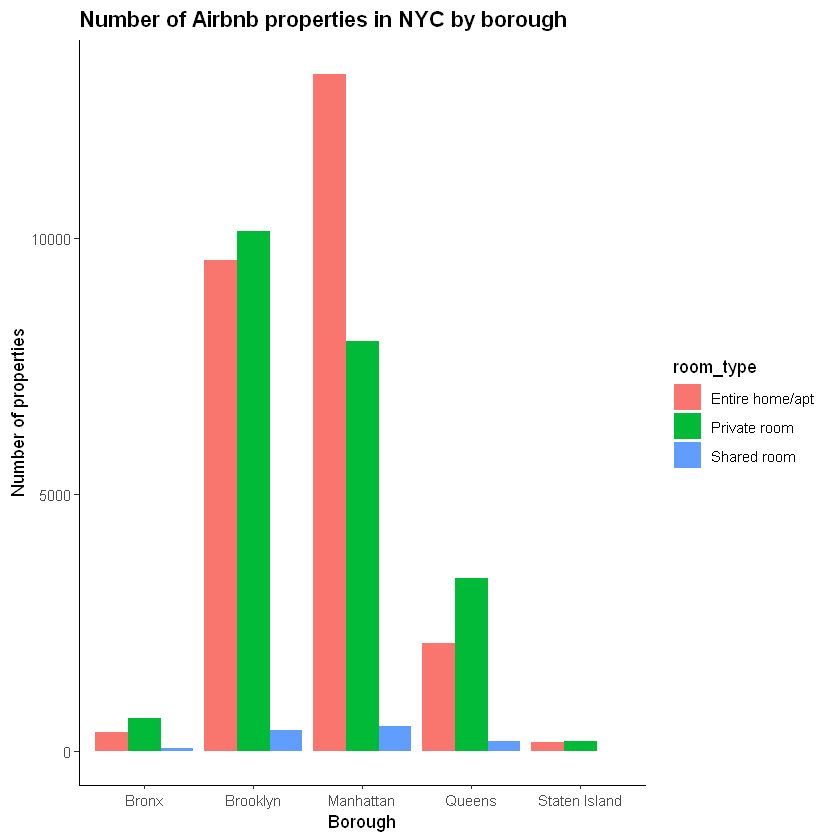

In [20]:
# Observing number of properties by neighborhood group
n_airbnb_by_area <- airbnb_by_area %>%
  group_by(neighbourhood_group) %>%
  count(room_type)

ggplot(n_airbnb_by_area, aes(x = neighbourhood_group, y = n, fill = room_type)) +
  geom_bar(position = "dodge", stat = "identity") +
  theme_classic() +
  labs(title = "Number of Airbnb properties in NYC by borough", x = "Borough", y = "Number of properties") +
  theme(plot.title = element_text(face = "bold"))

Interesting, diving deeper gives us the insight that in Manhattan, many of the listing are for Entire home/apt proprtionally as compared to the other boroughs. This may explain, in part, why there are so many high priced listings in Manhattan as compared to other boroughs.  

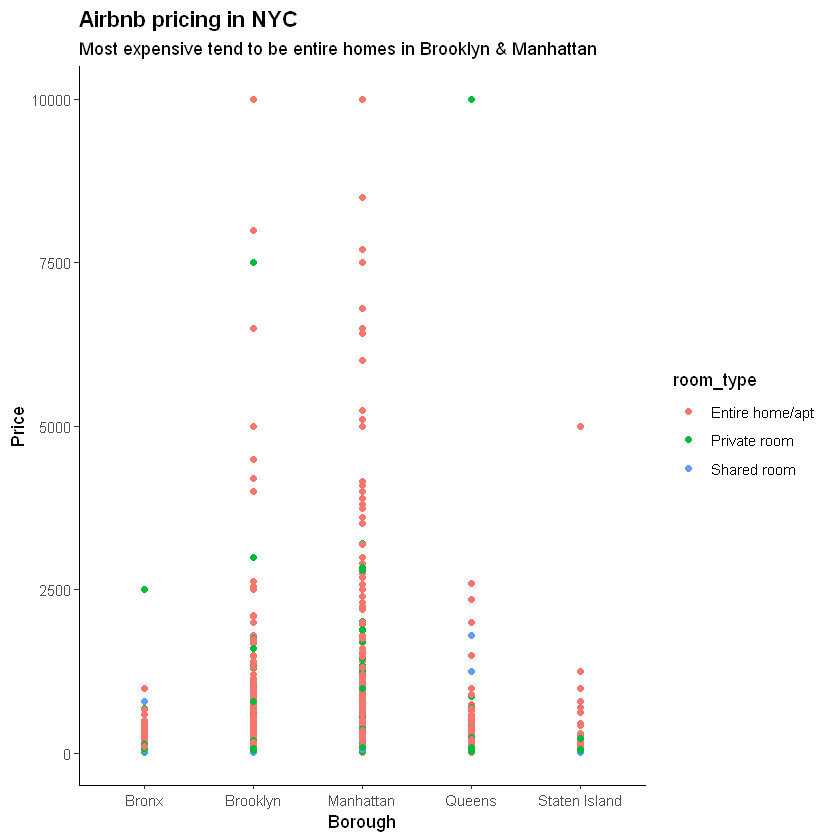

In [21]:
# Observing prices by property type and neighborhood group
ggplot(airbnb_by_area) +
  geom_point(aes(x = neighbourhood_group, y = price, color = room_type)) +
  theme_classic() +
  labs(title = "Airbnb pricing in NYC", subtitle = "Most expensive tend to be entire homes in Brooklyn & Manhattan", x = "Borough", y = "Price") +
  theme(plot.title = element_text(face = "bold"))

However looking at this categorical scatterplot, we can see that even in Manhattan, most of the point density is located below 2500 Price point. This is true even for Entire home/apt instances.

##### Let's move towards the statstical inference part of the analysis



### 4. Statistical Inference

To recap till now, we know that the highest points density are located in Brooklyn or Manhattan boroughs. Looking at the geospatial analysis I can hypothesis that the highest priced listings are within Manhattan with the entire home/apt type being predominately the room type for these higher priced listing in both Manhattan and Brooklyn.

Let's concentrate on Manhattan and Brooklyn then for our statistical inference analysis.

Let's setup a statistical inference test for this to test our hyothesis that manhattan's average price listing due to these higher priced listing would be great than Brooklyn's average price. 

The null and the alternate hypothesis would be:-

##### Ho: That population mean price of Manhattan is equal to population mean price of Brooklyn.

##### Ha: That Manhattan's population mean price is greater than population mean price of Brooklyn.

##### For this we will do a one sided t-test with 95 percent confidence interval and test against a signifiance level of 5 percent.

In [22]:
#airbnb_by_area

df_inference <- airbnb_by_area %>%
        filter(neighbourhood_group == "Brooklyn" | neighbourhood_group == "Manhattan") %>%
        select(neighbourhood_group, price)
head(df_inference,10)


neighbourhood_group,price
Brooklyn,149
Manhattan,225
Manhattan,150
Brooklyn,89
Manhattan,80
Manhattan,200
Brooklyn,60
Manhattan,79
Manhattan,79
Manhattan,150


In [23]:
t.test(price ~ neighbourhood_group, alternative = "less", data = df_inference)


	Welch Two Sample t-test

data:  price by neighbourhood_group
t = -30.456, df = 37235, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -68.53327
sample estimates:
 mean in group Brooklyn mean in group Manhattan 
               124.4389                196.8849 


Here we see that our p-value is very small hence we will reject the null hypothesis. 

In conclusion this supports my hypothesis that there is signifiant information to support the idea that the prices in Manhattan are greater than the prices in Brooklyn.

### 5. Linear Regression Model

So we have done hyopethisis testing so far. Now we will build a few different linear regression models and make a decision on which one to consider the best one to adopt for our future predictions.

Here are the steps I will take with setting up the different models:
1. We will be using the categorial variables neighbourhood_group and room_types to predict the price of future instances. I will use the adjusted R2 as a measure of the goodness of fit for our models and select a model at the end based on this value.
2. I will use our initial datset without the 0 values removed for model 1 through 4.
3. Since we have categorical variables, I will compare the linear regression model without one hot encoding(model 1) with a model I make in which I use one_hot encoded variables which I created prior to execution. If both of these are equivelent I will no longer use the one hot encoded variables. The purpose of this test is to make sure the out of box linear regression model does a good job handling the categorical variables.
4. Model 3 and Model 4 will use only 1 of the categorical variables each in the model and see if that increases the adjusted R square value.
5. For Model 5 I will subset the data to remove the 0 price instances along with the instances of over 1000 for the price. Remember earlier in our analysis we hypothesized that a vast majority of our instances were coming from these lower priced instances and that it is possible these higher prices listings are a result of prices being quoted as values for the entirety of the stay rather than the daily price value. Note: after inspection of the variable "minimum_nights" we still cannot concreatly conclude that the prices are per night for these higher priced instances .
6. Model 6 we will further subset the data to instances priced under 150. 150 is around the average price of both Brooklyn and Manhattan hence it seems a good cutoff point.
7. Model 7 we will further subset the data with instances priced under 120.


In [24]:
fit <- lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$neighbourhood_group + AirBNB_2019_data$room_type)
summary(fit)


Call:
lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$neighbourhood_group + 
    AirBNB_2019_data$room_type)

Residuals:
   Min     1Q Median     3Q    Max 
-240.9  -63.3  -22.8    9.1 9940.9 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                        161.471      7.105  22.725
AirBNB_2019_data$neighbourhood_groupBrooklyn        21.843      7.163   3.050
AirBNB_2019_data$neighbourhood_groupManhattan       79.448      7.164  11.089
AirBNB_2019_data$neighbourhood_groupQueens           9.064      7.611   1.191
AirBNB_2019_data$neighbourhood_groupStaten Island   12.756     13.809   0.924
AirBNB_2019_data$room_typePrivate room            -111.483      2.144 -52.002
AirBNB_2019_data$room_typeShared room             -133.641      6.923 -19.305
                                                  Pr(>|t|)    
(Intercept)                                        < 2e-16 ***
AirBNB_2019_data$neighbourhood_gro

In [26]:
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Brooklyn = if_else(neighbourhood_group == 'Brooklyn', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Bronx = if_else(neighbourhood_group == 'Bronx', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Manhattan = if_else(neighbourhood_group == 'Manhattan', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Queens = if_else(neighbourhood_group == 'Queens', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Staten_Island = if_else(neighbourhood_group == 'Staten Island', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Entire_Home_Apt = if_else(room_type == 'Entire home/apt', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Private_Room = if_else(room_type == 'Private room', 1, 0))
AirBNB_2019_data <- AirBNB_2019_data %>% 
  mutate(OH_Shared_room = if_else(room_type == 'Shared room', 1, 0))
head(AirBNB_2019_data,10)

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,OH_Brooklyn,OH_Bronx,OH_Manhattan,OH_Queens,OH_Staten_Island,OH_Entire_Home_Apt,OH_Private_Room,OH_Shared_room
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,1,0,0,0,0,0,1,0
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,0,0,1,0,0,1,0,0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,365,0,0,1,0,0,0,1,0
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,1,0,0,0,0,1,0,0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,0,0,1,0,0,1,0,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,1,129,0,0,1,0,0,1,0,0
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,1,0,1,0,0,0,0,0,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,1,220,0,0,1,0,0,0,1,0
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,1,0,0,0,1,0,0,0,1,0
5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,...,4,188,0,0,1,0,0,1,0,0


In [27]:
fit_2 <- lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$OH_Brooklyn + AirBNB_2019_data$OH_Bronx + 
         AirBNB_2019_data$OH_Manhattan + AirBNB_2019_data$OH_Queens + AirBNB_2019_data$OH_Staten_Island +
         AirBNB_2019_data$OH_Entire_Home_Apt + AirBNB_2019_data$OH_Private_Room + AirBNB_2019_data$OH_Shared_room)
summary(fit_2)


Call:
lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$OH_Brooklyn + 
    AirBNB_2019_data$OH_Bronx + AirBNB_2019_data$OH_Manhattan + 
    AirBNB_2019_data$OH_Queens + AirBNB_2019_data$OH_Staten_Island + 
    AirBNB_2019_data$OH_Entire_Home_Apt + AirBNB_2019_data$OH_Private_Room + 
    AirBNB_2019_data$OH_Shared_room)

Residuals:
   Min     1Q Median     3Q    Max 
-240.9  -63.3  -22.8    9.1 9940.9 

Coefficients: (2 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           40.586     13.662   2.971  0.00297 ** 
AirBNB_2019_data$OH_Brooklyn           9.087     12.027   0.756  0.44994    
AirBNB_2019_data$OH_Bronx            -12.756     13.809  -0.924  0.35560    
AirBNB_2019_data$OH_Manhattan         66.692     12.023   5.547 2.92e-08 ***
AirBNB_2019_data$OH_Queens            -3.692     12.305  -0.300  0.76414    
AirBNB_2019_data$OH_Staten_Island         NA         NA      NA       N

After reviewing the summary, we can see that the Adjusted R-Squared values are identical. Hence we can conclude that we do not need to use the one-hot encoded variables.

Also looking at the summary the goodness of fit is pretty poor for these models. Let us try to improve this by runing modesl with just one categorical variable being used.

In [28]:
fit_3 = lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$neighbourhood_group)
summary(fit_3)


Call:
lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$neighbourhood_group)

Residuals:
   Min     1Q Median     3Q    Max 
-196.9  -74.4  -36.9   22.5 9900.5 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                         87.497      7.168  12.207
AirBNB_2019_data$neighbourhood_groupBrooklyn        36.886      7.360   5.012
AirBNB_2019_data$neighbourhood_groupManhattan      109.379      7.346  14.890
AirBNB_2019_data$neighbourhood_groupQueens          12.021      7.827   1.536
AirBNB_2019_data$neighbourhood_groupStaten Island   27.316     14.200   1.924
                                                  Pr(>|t|)    
(Intercept)                                        < 2e-16 ***
AirBNB_2019_data$neighbourhood_groupBrooklyn      5.41e-07 ***
AirBNB_2019_data$neighbourhood_groupManhattan      < 2e-16 ***
AirBNB_2019_data$neighbourhood_groupQueens          0.1246    
AirBNB_2019_data$neighbourhood_grou

In [29]:
fit_4 = lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$room_type)
summary(fit_4)


Call:
lm(formula = AirBNB_2019_data$price ~ AirBNB_2019_data$room_type)

Residuals:
   Min     1Q Median     3Q    Max 
-211.8  -59.8  -29.8    9.2 9910.2 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             211.794      1.456  145.43   <2e-16 ***
AirBNB_2019_data$room_typePrivate room -122.013      2.130  -57.30   <2e-16 ***
AirBNB_2019_data$room_typeShared room  -141.667      6.970  -20.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 232.1 on 48892 degrees of freedom
Multiple R-squared:  0.06561,	Adjusted R-squared:  0.06558 
F-statistic:  1717 on 2 and 48892 DF,  p-value: < 2.2e-16


This did not help and lowered our Adjusted R-squared value. At this point we will try subsetting the data to remove instances which can be deemed outliers.

In [30]:
AirBNB_2019_data_subset <- subset(AirBNB_2019_data, price > 0)
AirBNB_2019_data_subset <- subset(AirBNB_2019_data_subset, price < 1000)

fit_5 = lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group +
           AirBNB_2019_data_subset$room_type)
summary(fit_5)


Call:
lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group + 
    AirBNB_2019_data_subset$room_type)

Residuals:
    Min      1Q  Median      3Q     Max 
-207.04  -47.77  -17.04   17.96  903.64 

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                               150.7334     2.9535
AirBNB_2019_data_subset$neighbourhood_groupBrooklyn        19.3496     2.9771
AirBNB_2019_data_subset$neighbourhood_groupManhattan       66.3087     2.9781
AirBNB_2019_data_subset$neighbourhood_groupQueens           7.3951     3.1633
AirBNB_2019_data_subset$neighbourhood_groupStaten Island   -0.9871     5.7507
AirBNB_2019_data_subset$room_typePrivate room             -99.7269     0.8922
AirBNB_2019_data_subset$room_typeShared room             -120.2738     2.8809
                                                          t value Pr(>|t|)    
(Intercept)                                       

In [31]:
AirBNB_2019_data_subset <- subset(AirBNB_2019_data_subset, price < 150)

fit_6 = lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group +
           AirBNB_2019_data_subset$room_type)
summary(fit_6)


Call:
lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group + 
    AirBNB_2019_data_subset$room_type)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.28  -17.31   -2.12   16.69  101.60 

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                               94.2558     0.7896
AirBNB_2019_data_subset$neighbourhood_groupBrooklyn        9.4689     0.7885
AirBNB_2019_data_subset$neighbourhood_groupManhattan      24.0225     0.7979
AirBNB_2019_data_subset$neighbourhood_groupQueens          4.6571     0.8382
AirBNB_2019_data_subset$neighbourhood_groupStaten Island  -1.1088     1.5537
AirBNB_2019_data_subset$room_typePrivate room            -36.6051     0.2899
AirBNB_2019_data_subset$room_typeShared room             -56.3229     0.7689
                                                          t value Pr(>|t|)    
(Intercept)                                               

In [32]:
AirBNB_2019_data_subset <- subset(AirBNB_2019_data_subset, price < 120)
fit_7 = lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group +
           AirBNB_2019_data_subset$room_type)
summary(fit_7)


Call:
lm(formula = AirBNB_2019_data_subset$price ~ AirBNB_2019_data_subset$neighbourhood_group + 
    AirBNB_2019_data_subset$room_type)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.145 -14.326  -0.821  13.998  72.402 

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                               81.7832     0.6808
AirBNB_2019_data_subset$neighbourhood_groupBrooklyn        7.5425     0.6709
AirBNB_2019_data_subset$neighbourhood_groupManhattan      19.3620     0.6836
AirBNB_2019_data_subset$neighbourhood_groupQueens          4.1190     0.7127
AirBNB_2019_data_subset$neighbourhood_groupStaten Island   0.4057     1.3193
AirBNB_2019_data_subset$room_typePrivate room            -25.3238     0.2865
AirBNB_2019_data_subset$room_typeShared room             -42.7277     0.6522
                                                         t value Pr(>|t|)    
(Intercept)                                              12

Finally looking at model 5,6 and 7 we can see that subsetting the data really does help with the goodness of fit. When we remove the 0 price values and subset the data where price is less than 1000, our adjusted R-squared goes to .284. When we further subset the data where price is less than 150 our R-squared goes to .4045. Finally when we try to subset the data further to price values under 120 our Adjusted R-squared actually goes down to 0.3066. Hence I will conlude that subsetting the data only till 150 and under while considering everything above as outlier is the best method to build a prediction model that can predict future instances. 

##### Model Selected: Model 6

### 6. Final Conclusions and Insights



Here are the insights and conclusions our analysis yielded:

1. We saw that majority of the instances came from the boroughs of Brooklyn and Manhattan.
2. We saw that "share_room" was a very small percentage of room_type.
3. We saw that the average price was 152 but the max price went all the way up to 10000.
4. While doing our geospatial analysis we infered that the higher priced instances were coming from Manhattan.
5. While doing our geospatial analysis, we first hypothesized that the average price of Manhattan's instances would be higher than that of Brooklyn's instances. 
6. We further grouped and divided the data by borough and room type. We noticed instances where the price was 0. We decided that they were outliers in our data and should be removed from further analysis(though we do use these instances in some of the ealier linear regression models we build).
7. We also hypothesized that the higher priced values might be because some of these are listing the total amount of the stay rate rather than the per day rate. There is no way in the data to determine if this is the case. 
8. Counter to the previous hypothesis we did see that most of the high priced instances were for "entire home/apt" room types. That could possibly explain some of the higher pricing however again there is no way to check without more data.
9. We then conducted our hypothesized t-test to see if the average price for Manhattan instances are higher than the average price of Brooklyn's instances. Our t-test produced a p - value much lower than the significance level we set of 5 percent. Hence we had enough evidence to reject the null hypothesis and conclude that the population mean price for Manhattan was probably higher than that of Brooklyn's.
10. Finanlly we created linear regression models and concluded the best model was the one that uses both chosen categorical variables(neighbourhood_group & room_type) with data subsetted to remove 0 priced instances and instances priced as 150 and above.

### 7. Final Thoughts

All in all this was an interesting dataset to work with. I would have liked a way to delve deeper into some of the issues like the 0 priced instances and the hypothesized issue of daily price quotes vs full stay price quotes. Certainly if I was working at Airbnb I would be trying to get more information from the data acquisition team to answer these questions. I also wanted to stay within the scope of the course. I would have liked to create some models which are more robust to outliers like decision trees, random forest or XGboost. In general however I would have thought rental prices on Aribnb would have followed a linear trend but maybe there is some nonlinearity involved which I have not considered. In my own time, I will try some other models on this data to see if I can get better fit.